# CompEngine dataset analysis
## Analysis #2: Explore balanced subset

**Project URL:** https://www.comp-engine.org/

**Get data in:** https://www.comp-engine.org/#!browse

**Date:** May 18 2020

### Objectives:
1. Explore the balanced subset created previously
2. Create a unified subsample train/test dataset

### Results (please check the analysis date):
1. A single random instance from all classes are plotted
2. Generated two files for train ('subsample_train.txt') and test ('subsample_test.txt') with metadata and data

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
y_inds_train = pd.read_csv("../1_getting_balanced_subset/inds_train.csv", index_col="timeseries_id")
y_inds_test = pd.read_csv("../1_getting_balanced_subset/inds_test.csv", index_col="timeseries_id")

cat_freqs_train = y_inds_train["category"].value_counts()
cat_freqs_test = y_inds_test["category"].value_counts()

# Sanity check if all 46 classes were read correctly
assert cat_freqs_train.shape[0] == 46
assert cat_freqs_test.shape[0] == 46

# Sanity check if all classes are perfectly balanced with 16 instances
# per class (see notebook #1 for a clear explanation)
assert np.allclose(16, cat_freqs_train)
assert np.allclose(4, cat_freqs_test)

y_inds_train.head()

,category,inst_ind
timeseries_id,,
e0b36e39-3872-11e8-8680-0242ac120002,Beta noise,25254
81db0cf2-3883-11e8-8680-0242ac120002,Relative humidity,14878
380eb353-387a-11e8-8680-0242ac120002,RR,6577
f33f461c-3871-11e8-8680-0242ac120002,Tremor,27821
7bcad309-3874-11e8-8680-0242ac120002,Noisy sinusoids,14226


In [3]:
skip_func_train = lambda row_ind: row_ind != 0 and row_ind-1 not in y_inds_train["inst_ind"].values
skip_func_test = lambda row_ind: row_ind != 0 and row_ind-1 not in y_inds_test["inst_ind"].values

y_train = pd.read_csv("../data/comp-engine-export-datapoints.20200503.csv",
                      header=0,
                      nrows=y_inds_train.shape[0],
                      skiprows=skip_func_train,
                      low_memory=True,
                      index_col="timeseries_id",
                      dtype=str)

y_test = pd.read_csv("../data/comp-engine-export-datapoints.20200503.csv",
                     header=0,
                     nrows=y_inds_test.shape[0],
                     skiprows=skip_func_test,
                     low_memory=True,
                     index_col="timeseries_id",
                     dtype=str)

y_train.head()

,datapoints
timeseries_id,
003ae56e-3871-11e8-8680-0242ac120002,"781.22,797.39,817.74,835.89,858.99,879.12,905...."
003da696-3872-11e8-8680-0242ac120002,"333.16,333.34,340.18,327.7,329.57,326.83,317.8..."
00434075-3876-11e8-8680-0242ac120002,"2.2306,-3.4934,1.7166,-1.3825,-0.88767,-1.0873..."
004405e4-3880-11e8-8680-0242ac120002,"101000,101010,101040,101160,101280,101250,1012..."
004a5f33-3873-11e8-8680-0242ac120002,"0.4,0,0,0.5,0.15,0.1,0.3,0.6,0.2,0.15,0,0.6,0,..."


In [4]:
# Note: sanity check if the chosen time-series are really the same as
# selected previously while creating the balanced subsample
assert y_train.shape[0] == y_inds_train.shape[0]
assert y_test.shape[0] == y_inds_test.shape[0]
assert np.all(np.sort(y_train.index) == np.sort(y_inds_train.index))
assert np.all(np.sort(y_test.index) == np.sort(y_inds_test.index))

In [5]:
y_concat_train = pd.concat([y_inds_train, y_train], axis=1, join="inner")
y_concat_test = pd.concat([y_inds_test, y_test], axis=1, join="inner")

del y_inds_train
del y_train
del y_inds_test
del y_test

y_concat_train.head()

,category,inst_ind,datapoints
timeseries_id,,,
e0b36e39-3872-11e8-8680-0242ac120002,Beta noise,25254,"0.73617,0.99008,0.71331,0.87094,0.75527,0.9912..."
81db0cf2-3883-11e8-8680-0242ac120002,Relative humidity,14878,"95.5,79,86.75,8.75,62.75,98.75,79.74,44.75,92...."
380eb353-387a-11e8-8680-0242ac120002,RR,6577,"0.6328,0.6328,0.625,0.6328,0.625,0.625,0.6172,..."
f33f461c-3871-11e8-8680-0242ac120002,Tremor,27821,"-0.6,1.5,1.5,0.1,0.9,0.6,0.3,-0.2,0.7,1,0.1,1...."
7bcad309-3874-11e8-8680-0242ac120002,Noisy sinusoids,14226,"0.38553,0.2014,1.8705,0.47883,0.33958,0.009558..."


In [6]:
y_concat_train.to_csv("subsample_train.csv")
y_concat_test.to_csv("subsample_test.csv")

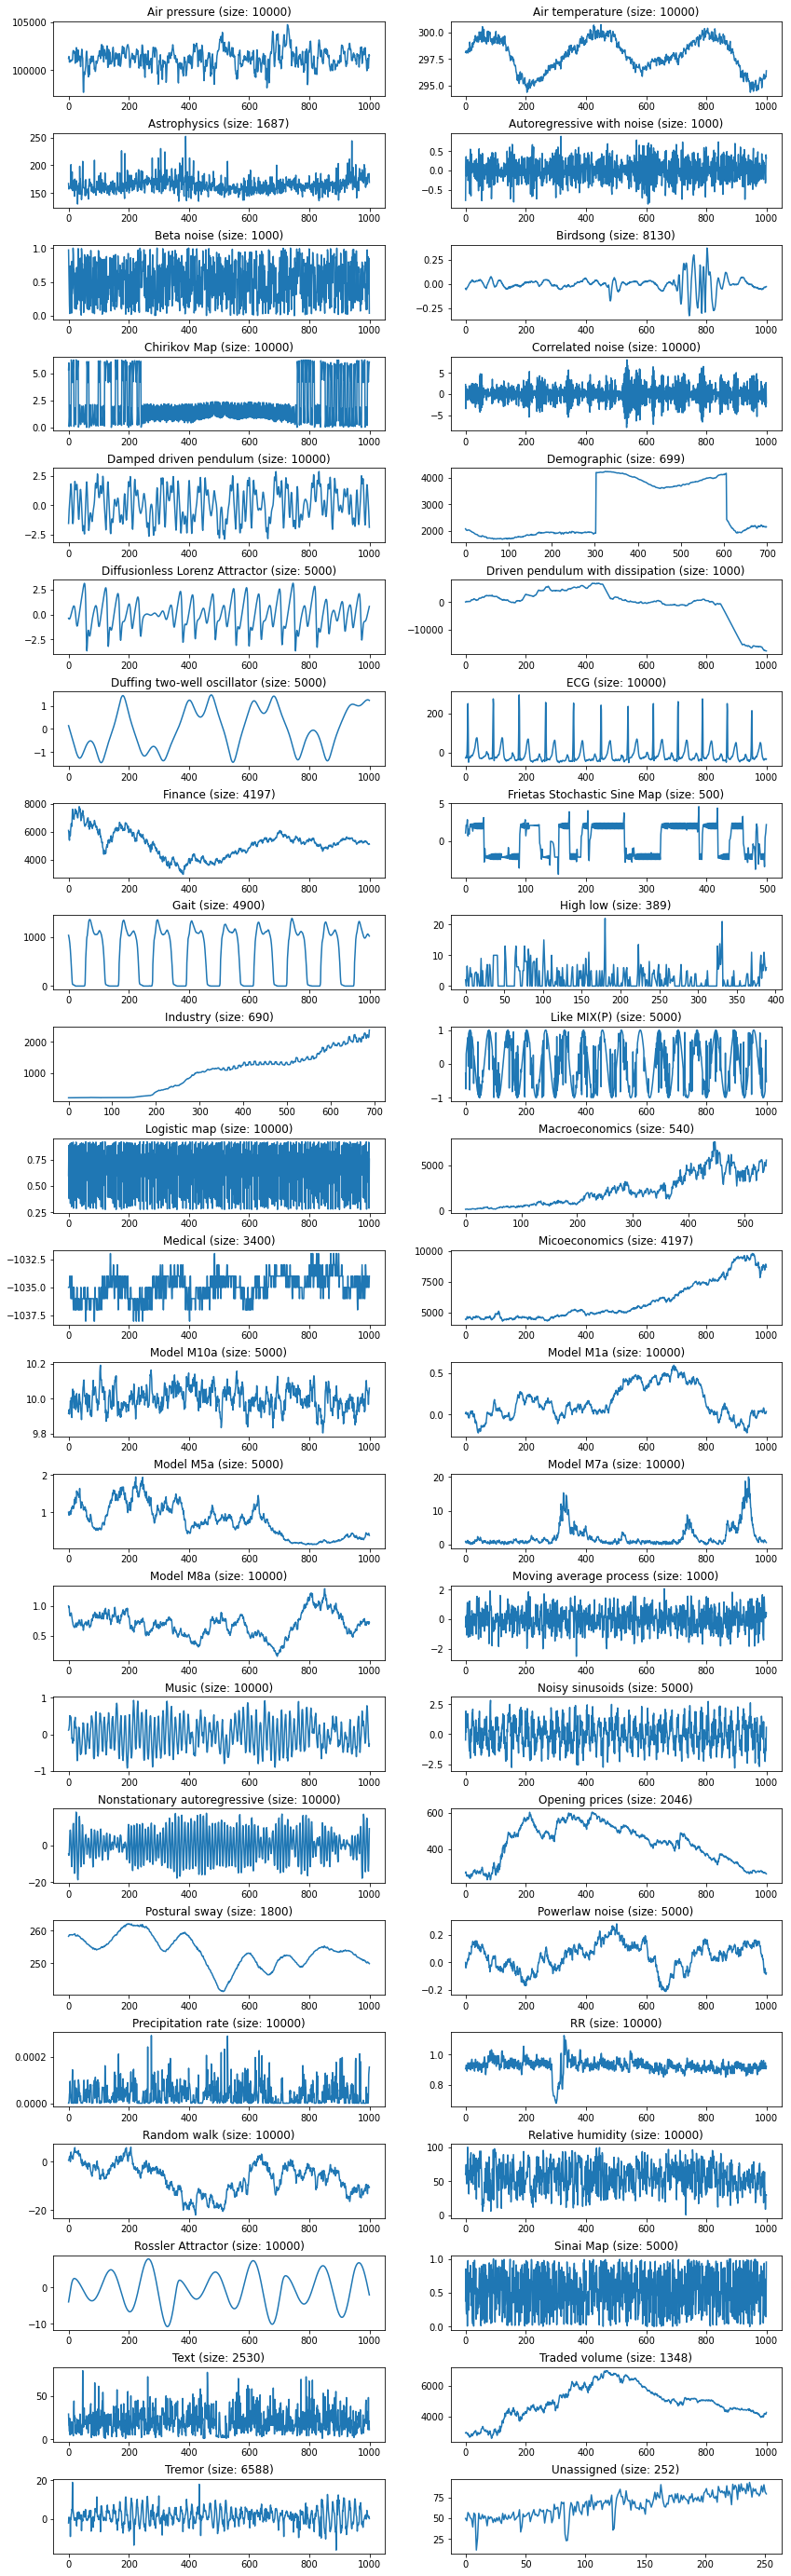

In [7]:
plot_samples = y_concat_train.groupby("category").apply(lambda group: group.sample(1, random_state=16))

# Sanity check if one instance of each class was obtained
assert plot_samples.shape[0] == cat_freqs_train.shape[0]

plt.figure(figsize=(14, 50))
plt.subplots_adjust(hspace=0.5)

for plt_ind, (cat, data) in enumerate(plot_samples[["category", "datapoints"]].values, 1):
    print(f"{plt_ind} of {plot_samples.shape[0]}...", end="\r")
    plt.subplot(46 // 2, 2, plt_ind)
    ts = np.asarray(data.split(","), dtype=float)
    plt.plot(ts[:1000])
    plt.title(f"{cat} (size: {ts.size})")

plt.show()